<a href="https://colab.research.google.com/github/juanandres-montero/macroeconometria/blob/main/Laboratorio_08_Arch_y_Garch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">
<style>
body {
  font-family: "Computer Modern Sans", sans-serif;
}
h1, h3 {
  font-weight: bold;
}
</style>

<center>
  <img src="https://github.com/juanandres-montero/microeconometria/blob/main/logo%20EEC%20grande.png?raw=1" width="396" height="161">
  <h1></h1>
  <h1 style="text-align: center;">EC-4301 MACROECONOMETRÍA</h1>
  <h2 style="text-align: center;">Asist. Juan Andrés Montero Zúñiga</h2>
  <br>
  <h3> Laboratorio 08:</h3>
  <div style="font-size:250%;color:white; background-color: #0064b0;">ARCH y GARCH</div>
</center>
<br><br>

<i>
    Creado: 2024-Jun
</i>

<hr>

  * ARCH se enfoca en modelar la volatilidad condicional como una función lineal de los errores cuadráticos rezagados.
  
  * GARCH extiende ARCH al incluir términos autoregresivos en la ecuación de varianza condicional, lo que permite una modelización más flexible y general de la volatilidad.

# Ejemplo: Acciones de Mastercard Inc.

In [2]:
!pip install yfinance -q

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

tickerSymbol = 'MA'
tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2024-1-1')
tickerDf['Daily Return'] = tickerDf['Close'].pct_change()
#tickerDf['Daily Return'] = np.log(tickerDf['Close'] / tickerDf['Close'].shift(1))
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return
Date,,,,,,,,
2015-01-02 00:00:00-05:00,81.735521,82.376733,80.075915,80.792564,4505800,0.00,0.0,NaN
2015-01-05 00:00:00-05:00,80.424797,80.481372,78.312575,78.520020,6441400,0.00,0.0,-0.028128
2015-01-06 00:00:00-05:00,78.887781,79.000931,77.133880,78.350288,7690000,0.00,0.0,-0.002162
2015-01-07 00:00:00-05:00,79.455647,79.625707,78.482529,79.569023,5846800,0.16,0.0,0.015555
2015-01-08 00:00:00-05:00,80.485474,80.891728,80.334306,80.806694,5174200,0.00,0.0,0.015555


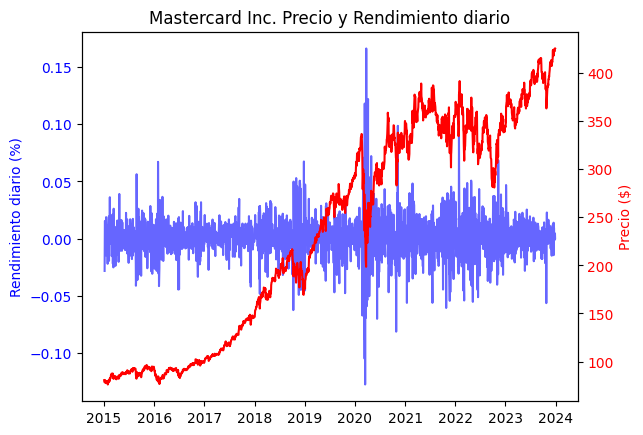

In [4]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
color = 'blue'
ax1.set_ylabel('Rendimiento diario (%)', color=color)
ax1.plot(tickerDf['Daily Return'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'red'
ax2.set_xlabel('Date')
ax2.set_ylabel('Precio ($)', color=color)
ax2.plot(tickerDf['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Mastercard Inc. Precio y Rendimiento diario')
plt.show()

In [5]:
rendimientos = tickerDf['Daily Return'].dropna()
rendimientos.head()

Date
2015-01-05 00:00:00-05:00   -0.028128
2015-01-06 00:00:00-05:00   -0.002162
2015-01-07 00:00:00-05:00    0.015555
2015-01-08 00:00:00-05:00    0.015555
2015-01-09 00:00:00-05:00   -0.012744
Name: Daily Return, dtype: float64

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(rendimientos)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpretar los resultados
if result[1] <= 0.05:
    print('La serie parece ser estacionaria (rechazamos la hipótesis nula de no estacionariedad).')
else:
    print('La serie parece no ser estacionaria (no podemos rechazar la hipótesis nula de no estacionariedad).')

ADF Statistic: -12.918575067883298
p-value: 3.9182779472254724e-24
Critical Values:
	1%: -3.4332635674843694
	5%: -2.8628271349445633
	10%: -2.5674552025417263
La serie parece ser estacionaria (rechazamos la hipótesis nula de no estacionariedad).


In [7]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
best_aic = float("inf")
best_order = None
best_model = None
warnings.filterwarnings("ignore")
for p in range(5):
    for d in range(2):
        for q in range(5):
            try:
                model = ARIMA(rendimientos, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, d, q)
                    best_model = results
            except:
                continue

print(f"Mejor modelo ARIMA: ARIMA{best_order} - AIC: {best_aic}")
print(best_model.summary())
bestarima = best_model


Mejor modelo ARIMA: ARIMA(2, 1, 3) - AIC: -11942.075481795178
                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 2263
Model:                 ARIMA(2, 1, 3)   Log Likelihood                5977.038
Date:                Mon, 24 Jun 2024   AIC                         -11942.075
Time:                        15:10:15   BIC                         -11907.731
Sample:                             0   HQIC                        -11929.543
                               - 2263                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7911      0.020    -90.282      0.000      -1.830      -1.752
ar.L2         -0.9157      0.019    -48.771      0.000      -0.953   

# Mejor modelo ARIMA: ARIMA(4, 1, 3)

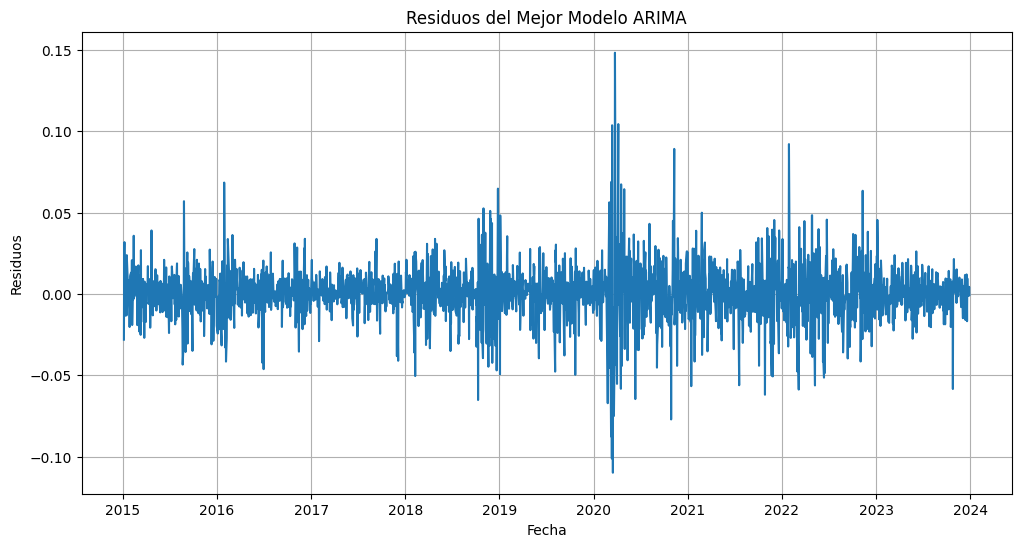

In [8]:
# Diagnóstico de residuos del mejor modelo
residuals = best_model.resid
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del Mejor Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()


In [9]:
from statsmodels.stats.diagnostic import het_arch

lb_test = het_arch(residuals)
print("Estadístico de prueba Ljung-Box:", lb_test[0])
print("Valor p:", lb_test[1])

Estadístico de prueba Ljung-Box: 560.7619461601886
Valor p: 4.457499410487541e-114


# ARCH(1)

In [10]:
!pip install arch -q

In [11]:
from arch import arch_model
arch_model = arch_model(residuals, vol='ARCH', p=1)
arch_fit = arch_model.fit()
print(arch_fit.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 36428798924.99518
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1419641223.351711
Iteration:      3,   Func. Count:     27,   Neg. LLF: 47462726.26799969
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1148097.6282667767
Iteration:      5,   Func. Count:     44,   Neg. LLF: 168734654782.4369
Iteration:      6,   Func. Count:     51,   Neg. LLF: 16474011089.508972
Iteration:      7,   Func. Count:     59,   Neg. LLF: 9139428.637352992
Iteration:      8,   Func. Count:     70,   Neg. LLF: -4316.659558047919
Iteration:      9,   Func. Count:     77,   Neg. LLF: -6019.394156171974
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2125294.2359563154
Iteration:     11,   Func. Count:     90,   Neg. LLF: -6093.299356046083
Iteration:     12,   Func. Count:     96,   Neg. LLF: -6113.125576883967
Iteration:     13,   Func. Count:     99,   Neg. LLF: -6113.125576883951
Optimization terminated successfully    (Exit mode 0)
  

# Encontrar ARCH/GARCH. Elige GARCH(1,1)

In [12]:
from arch import arch_model

model = arch_model(residuals)
results = model.fit()

print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.078227299775052e+20
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1.898961719022772e+16
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6334.392206293307
            Iterations: 2
            Function evaluations: 27
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6334.39
Distribution:                  Normal   AIC:                          -12660.8
Method:            Maximum Likelihood   BIC:                          -12637.9
                                        No. Observations:                 2263
Date:                Mon, Jun 24 2024   Df Residuals:                     2262
Time:   

In [13]:
from arch import arch_model

best_model = None
best_aic = float('inf')
for t in ['ARCH', 'GARCH']:
  for p in range(3):
      for q in range(3):
        try:
            model = arch_model(residuals, vol=t, p=p, q=q)
            model_fit = model.fit(disp='off')
            current_aic = model_fit.aic

            if current_aic < best_aic:
                best_aic = current_aic
                best_model = model_fit
                best_p = p
                best_q = q

        except:
            continue
print("Mejor modelo GARCH({},{}) encontrado:".format(best_p, best_q))
print(best_model.summary())

Mejor modelo GARCH(1,1) encontrado:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6334.39
Distribution:                  Normal   AIC:                          -12660.8
Method:            Maximum Likelihood   BIC:                          -12637.9
                                        No. Observations:                 2263
Date:                Mon, Jun 24 2024   Df Residuals:                     2262
Time:                        15:10:29   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.2967e-04 

In [18]:
import pandas as pd
residuals_df = residuals
residuals_df.to_csv('residuals.csv', index=False)

# En R

In [9]:
install.packages("rugarch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(rugarch)

In [11]:
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
  mean.model = list(armaOrder = c(4, 3), include.mean = TRUE),
  distribution.model = "norm"
)

In [12]:
data <- read.csv("/content/residuals.csv")

In [13]:
fit <- ugarchfit(spec = spec, data = data)

summary(fit)

   Length     Class      Mode 
        1 uGARCHfit        S4 

In [14]:
coeficientes <- coef(fit)
print(coeficientes)

           mu           ar1           ar2           ar3           ar4 
 5.480677e-04  1.094661e+00 -1.311701e+00  7.571563e-01 -5.882477e-02 
          ma1           ma2           ma3         omega        alpha1 
-1.107432e+00  1.272863e+00 -7.584349e-01  9.326742e-06  1.486708e-01 
        beta1 
 8.202944e-01 



please wait...calculating quantiles...


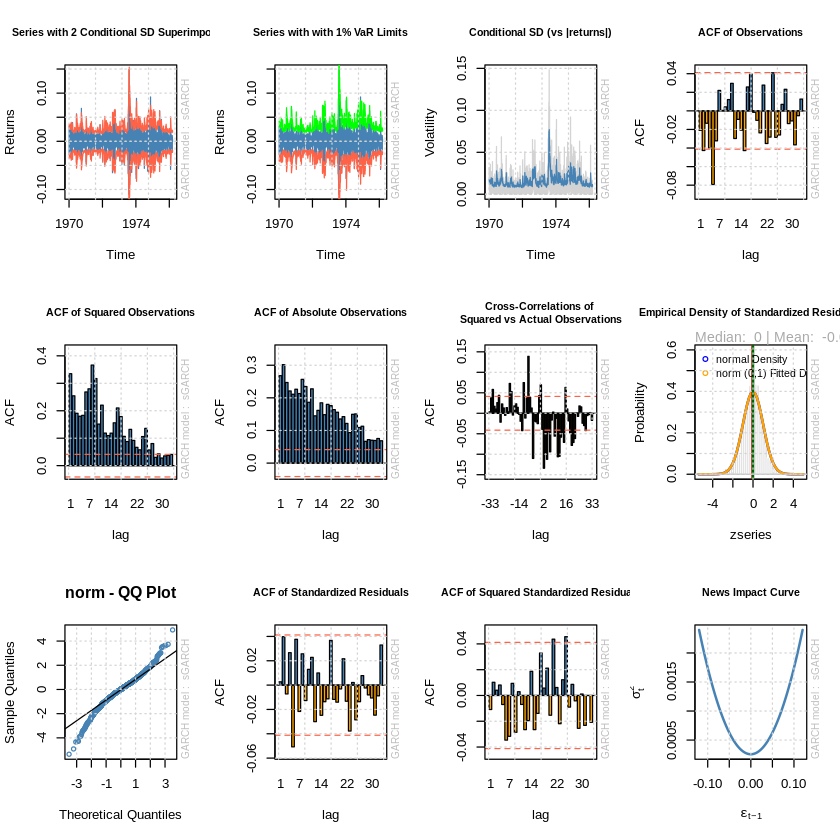

In [15]:
# Diagnóstico de residuos
plot(fit, which = "all")


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1976-03-13]:
         Series    Sigma
T+1   0.0008497 0.009242
T+2   0.0013892 0.009596
T+3   0.0003171 0.009927
T+4  -0.0005058 0.010238
T+5   0.0003165 0.010531
T+6   0.0014526 0.010806
T+7   0.0010576 0.011067
T+8  -0.0001940 0.011314
T+9  -0.0002341 0.011548
T+10  0.0009979 0.011771




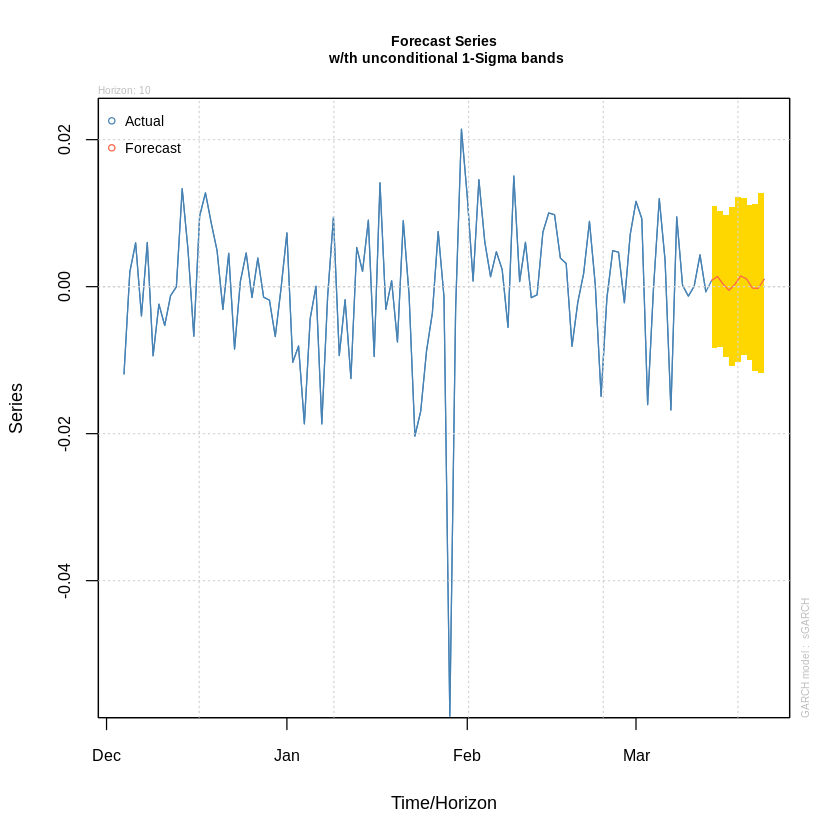

In [19]:
# Generar pronósticos
forecast <- ugarchforecast(fit, n.ahead = 10)
print(forecast)
# Plot the forecasted conditional mean
plot(forecast, which = 1)

### ARIMA(4,1,3)

$$
\Delta Y_t = \mu + \phi_1 \Delta Y_{t-1} + \phi_2 \Delta Y_{t-2} + \phi_3 \Delta Y_{t-3} + \phi_4 \Delta Y_{t-4} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \theta_3 \epsilon_{t-3} + \epsilon_t
$$

$$
\Delta Y_t = 4.748857 \times 10^{-4} + 1.373044 \Delta Y_{t-1} - 1.328788 \Delta Y_{t-2} + 0.874045 \Delta Y_{t-3} - 0.003301 \Delta Y_{t-4} - 1.390854 \epsilon_{t-1} + 1.349818 \epsilon_{t-2} - 0.912313 \epsilon_{t-3} + \epsilon_t
$$


### Fórmula de la Varianza GARCH(1,1)

$$
\sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$$


$$
\sigma_t^2 = 9.049056 \times 10^{-6} + 0.147181 \epsilon_{t-1}^2 + 0.825558 \sigma_{t-1}^2
$$


**Simularemos más ejemplos en Stata**

<a href="https://colab.research.google.com/github/juanandres-montero/macroeconometria/blob/main/Laboratorio_09_Cambio_Estructural.ipynb">Siguiente laboratorio>>></a>